In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import xarray as xr
from osgeo import gdal
from cartopy.mpl.gridliner import LATITUDE_FORMATTER,LONGITUDE_FORMATTER

In [3]:
years = pd.date_range(start="19900101",end="20200120",freq='y')
pc = [round(i,3)*2 for i in np.random.randn(len(years)) ]
pc2 = [round(i,3)*2 for i in np.random.randn(len(years)) ]

In [5]:
landsldie = "C:/Users/2019/Desktop/1a/data/catboost_result_wgs84.tif"
ds = xr.open_rasterio(landsldie)

In [6]:
# 设置投影，地图边界
proj = ccrs.PlateCarree(central_longitude=83)
leftlon, rightlon, lowerlat,upperlat = (82.4,84.7,43.0,43.8)
img_extent = [leftlon,rightlon,lowerlat,upperlat]

TypeError: Image data of dtype <U55 cannot be converted to float

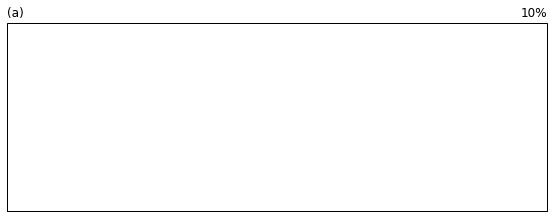

In [7]:
#建立画布
fig = plt.figure(figsize=(15,15))
#添加第一个子图，左上角图，注意c1是填色图层
f2_ax1 = fig.add_axes([0.1,0.24,0.5,0.5],projection = proj)
f2_ax1.set_title("(a)",loc="left")
f2_ax1.set_title("10%",loc='right')
f2_ax1.add_feature(cfeature.OCEAN,alpha=1,facecolor='w', zorder=1)
f2_ax1.add_feature(cfeature.COASTLINE.with_scale('10m'), zorder=2) 
f2_ax1.set_extent([leftlon,rightlon,lowerlat,upperlat],crs=ccrs.PlateCarree())
c1 = f2_ax1.imshow(landsldie)
#添加第二个子图，右上角图，注意c3是填色图图层，要使用统一色标，需C3和C1的levels相同
f2_ax2 = fig2.add_axes([0.65, 0.24, 0.5, 0.5],projection = proj)
contour_map(f2_ax2,img_extent,10)
f2_ax2.set_title('(b)',loc='left')
f2_ax2.set_title( '%.2f%%' % (var[1]*100),loc='right')
f2_ax2.add_feature(cfeature.OCEAN,alpha=1,facecolor='w', zorder=1)
f2_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=2)
#添加第三个子图，左下角图
f2_ax3 = fig2.add_axes([0.1, 0.1, 0.5, 0.2])
f2_ax3.set_title('(c)',loc='left')
plt.ylim(-4,4)
f2_ax3.axhline(0,linestyle="--")
f2_ax3.bar(years,pc,color='r')
f2_ax3.plot(years,pc2,color="b")
#添加第四个子图，左下角图
f2_ax4 = fig2.add_axes([0.65, 0.1, 0.5, 0.2])
f2_ax4.set_title('(d)',loc='left')
plt.ylim(-4,4)
f2_ax4.axhline(0,linestyle="--")
f2_ax4.bar(years,pc,color='r')
f2_ax4.plot(years,pc2,color="b")
#添加色标，position定义色标位置，c1指定从c1填色图层取色，由于C3,C1的levles相同，所以色标一致，orientation设置色标为水平还是垂直，format设置色标标签格式
position=fig2.add_axes([0.38, 0.33, 0.5, 0.017])
fig2.colorbar(c1,cax=position,orientation='horizontal',format='%.1f',)
plt.show()

In [36]:
f2_ax1.imshow??

Signature: f2_ax1.imshow(img, *args, **kwargs)
Source:   
    def imshow(self, img, *args, **kwargs):
        """
        Add the "transform" keyword to :func:`~matplotlib.pyplot.imshow'.

        Parameters
        ----------
        img
            The image to be displayed.

        Other Parameters
        ----------------
        transform: :class:`~cartopy.crs.Projection` or matplotlib transform
            The coordinate system in which the given image is
            rectangular.
        regrid_shape: int or pair of ints
            The shape of the desired image if it needs to be
            transformed.  If a single integer is given then
            that will be used as the minimum length dimension,
            while the other dimension will be scaled up
            according to the target extent's aspect ratio.
            The default is for the minimum dimension of a
            transformed image to have length 750, so for an
            image being transformed into a global